# CH 1_03_07_Dataset Generator

CS231n Convolutional Neural Networks for Visual Recognition
- http://aikorea.org/cs231n/

## numpy

In [4]:
# %matplotlib qt 외부창에 그래프 표현
%matplotlib inline

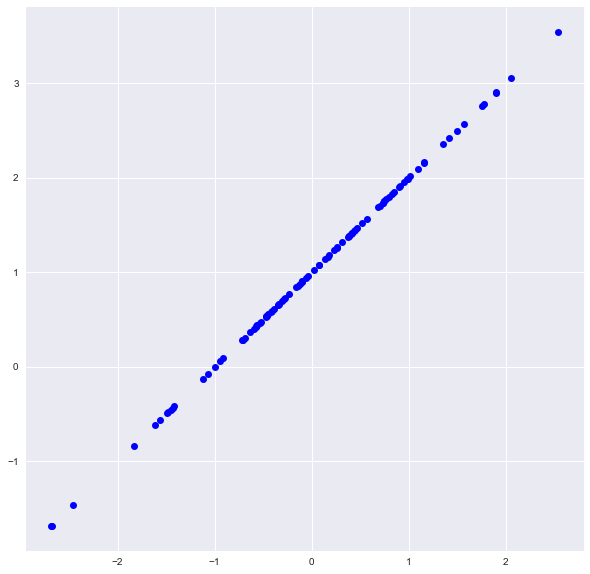

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x_data = np.random.normal(0,1, size=(N,1))
y_data = x_data + 1

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_data, y_data, 'bo')

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x_data = np.random.normal(0,1, size=(N,1))
y_data = x_data + 1

print(x_data.shape, y_data.shape)

(100, 1) (100, 1)


In [8]:
x_data, y_data

(array([[ 1.50934454],
        [ 2.47575229],
        [-0.31613334],
        [ 1.29502769],
        [-0.80779633],
        [ 1.45523992],
        [-1.09380574],
        [ 0.46180437],
        [-0.09931529],
        [ 0.3372325 ],
        [-0.25786176],
        [-0.28247411],
        [-0.11621492],
        [ 0.85994437],
        [ 0.44059796],
        [ 1.34182636],
        [ 0.50433197],
        [-1.41143301],
        [ 0.90749696],
        [-1.2626748 ],
        [-0.63778593],
        [-0.38947413],
        [ 0.91380452],
        [ 0.37182776],
        [-1.36626145],
        [-0.53135929],
        [ 0.29216838],
        [-0.09648213],
        [ 0.55364735],
        [-0.72875145],
        [ 0.38079257],
        [-0.44736199],
        [-0.44505425],
        [ 0.18906488],
        [ 0.48268827],
        [ 0.00285305],
        [ 0.11917679],
        [-0.59078781],
        [ 0.3670767 ],
        [-0.80950439],
        [ 0.53972287],
        [ 0.94609431],
        [-0.09278936],
        [-1

In [9]:
data = np.hstack((x_data, y_data))
print(data.shape)

(100, 2)


In [10]:
x_data = data[:, 0]
y_data = data[:, 1]

데이터에 노이즈 추가

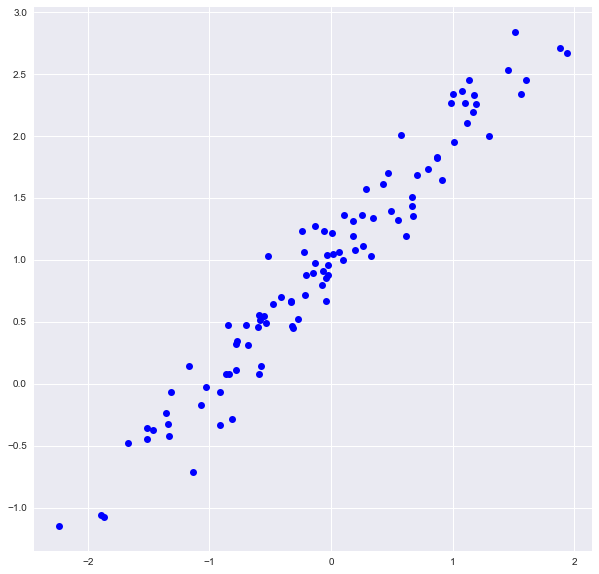

In [12]:
## import numpy as np
import matplotlib.pyplot as plt

N = 100
x_data = np.random.normal(0,1, size=(N,1))
y_data = x_data + 1 + 0.2*np.random.normal(0,1, size=(N,1))

print(x_data.shape)

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_data, y_data, 'bo')

<ipython-input-15-a673d797541c>:8: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  ax.plot(x_data, y_data, 'bo')


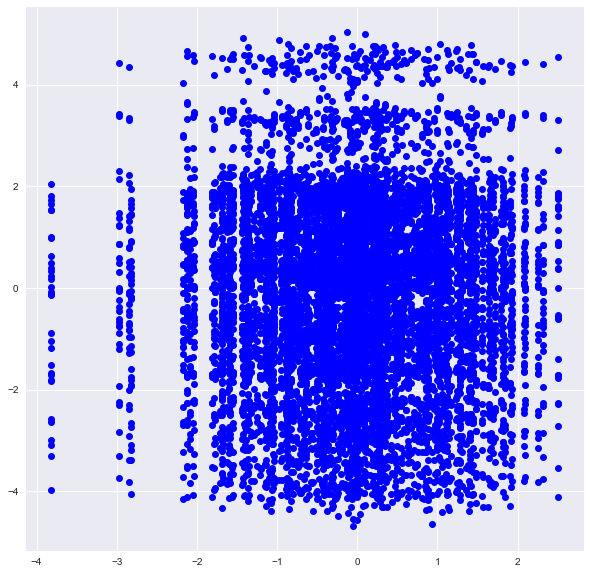

In [15]:
N = 100
n_feature = 3
x_data = np.random.normal(0,1, size=(N,n_feature))
y_data = np.sum(x_data, axis=1) + 0.2*np.random.normal(0,1, size=(N,1))

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_data, y_data, 'bo')

In [38]:
class dataset_generator:
    def __init__(self, feature_dim = 1, n_sample=100, noise=0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        self._coefficient = None
        self._init_set_coefficient()

    def _init_set_coefficient(self):
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0]
#         print(self._coefficient)
        
    def set_n_sample(self, n_sample):
        self._n_sample = n_sample
        
    def set_noisee(self, noise):
        self._noise = noise
        
    def set_coefficient(self, coefficient_List):
        self._coefficient = coefficient_List        
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size=(self._n_sample, 1))
        y_data = x_data + self._noise*np.random.normal(0,1, size=(self._n_sample,1))
        return x_data, y_data

data_gen = dataset_generator(feature_dim=3)
print(data_gen._n_sample)
data_gen.set_n_sample(200)
print(data_gen._n_sample)

100
200


In [39]:
data_gen = dataset_generator()
print(data_gen._n_sample)
data_gen.set_n_sample(200)
print(data_gen._n_sample)

100
200


In [40]:
data_gen = dataset_generator(feature_dim=3)
print(data_gen._coefficient)
data_gen.set_coefficient([2,-1,3,5])
print(data_gen._coefficient)

[1, 1, 1, 0]
[2, -1, 3, 5]


(200, 1) (200, 1)


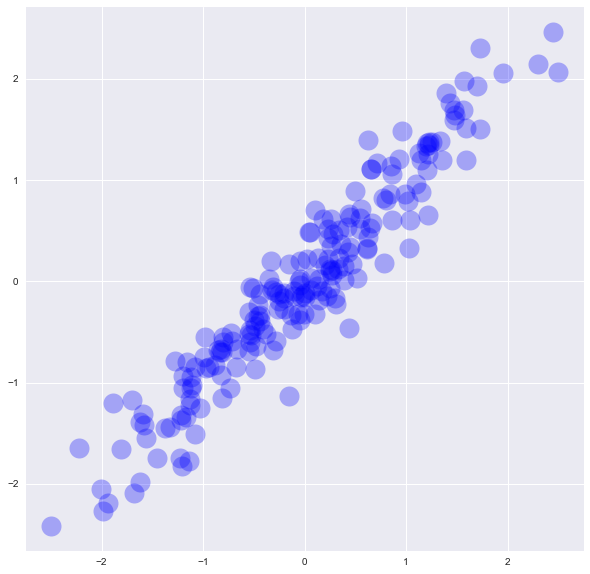

In [41]:
print(x_data.shape, y_data.shape)

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_data, y_data, 'bo', alpha=0.3, markersize=20)

In [49]:
class dataset_generator:
    def __init__(self, feature_dim = 1, n_sample=100, noise=0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        self._coefficient = None
        self._init_set_coefficient()

    def _init_set_coefficient(self):
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0]
#         print(self._coefficient)
        
    def set_n_sample(self, n_sample):
        self._n_sample = n_sample
        
    def set_noisee(self, noise):
        self._noise = noise
        
    def set_coefficient(self, coefficient_List):
        self._coefficient = coefficient_List        
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size=(self._n_sample, self._feature_dim))
        y_data = np.zeros(shape=(self._n_sample,1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx]*x_data[:,feature_idx].reshape(-1,1)
        y_data += self._coefficient[-1]
        y_data += self._noise*np.random.normal(0,1,size=(self._n_sample, 1))
        return x_data, y_data
    
    def dataset_visualizer(self):
        if self._feature_dim == 1:
            plt.style.use('seaborn')
            fig, ax = plt.subplots(figsize=(10,10))
            ax.plot(x_data, y_data, 'bo', alpha=0.3, markersize=20)
            ax.tick_params(axis='both', labelsize=30)
            ax.set_title('Dataset', fontsize=40, color='darkred')
            ax.set_xlabel('X data', fontsize=40, alpha=0.6)
            ax.set_ylabel('Y data', fontsize=40, alpha=0.6)
        else:
            class feature_dim_error(Exception):
                pass
            raise feature_dim_error('Visualization is valid for only feature_dim == 1')
    
data_gen = dataset_generator(feature_dim=3)
data_gen.make_dataset()
x_data, y_data = data_gen.make_dataset()
print(x_data.shape, y_data.shape)

(100, 3) (100, 1)


In [50]:
data_gen.dataset_visualizer()

feature_dim_error: Visualization is valid for only feature_dim == 1

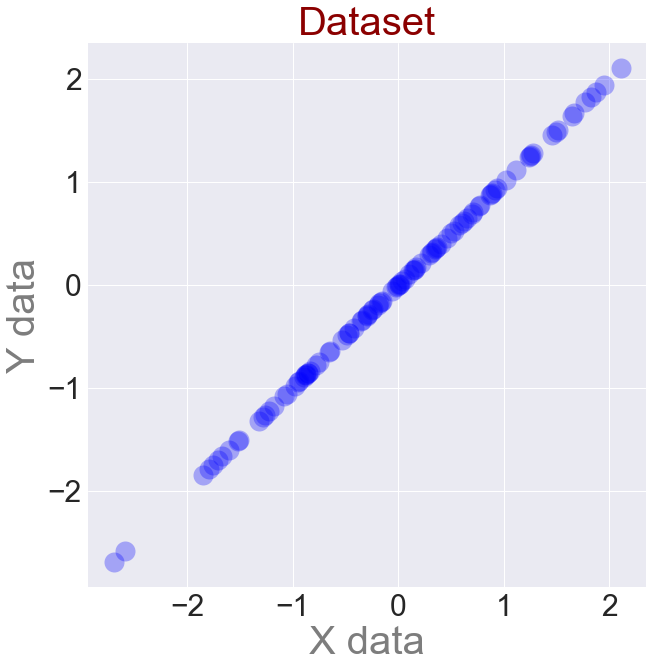

In [51]:
data_gen = dataset_generator()
data_gen.make_dataset()
x_data, y_data = data_gen.make_dataset()
data_gen.dataset_visualizer()